In [1]:
import json
import pandas as pd
import numpy as np
import re

### Read in Data

In [2]:
file_dir = "C:/Users/Jack/Desktop/Analysis Projects/Mod8-ETL/Data/"

In [3]:
# Open json and store raw data in variable
with open(f'{file_dir}wikipedia-movies.json', 'r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
# Read CSV files
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [5]:
# Peek at raw data in a new DataFrame
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Begin cleaning data

In [6]:
# Only include movies that have a Director and IMDB link
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                and 'imdb_link' in movie
                and 'No. of episodes' not in movie]
# Check length
len(wiki_movies)

7076

In [7]:
# Peek at new set of data by updating DataFrame
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def clean_movie(movie):
    movie = dict(movie)

    # Alternate Title column names
    alt_titles_list = ['Also known as', 'Arabic', 'Cantonese', 'Chinese', 'French', 'Hangul', 'Hebrew', 'Hepburn', 'Japanese', 'Literally',  'Mandarin', 'McCune–Reischauer', 'Original title', 'Polish',  'Revised Romanization', 'Romanized', 'Russian', 'Simplified', 'Traditional', 'Yiddish']
    alt_titles = {}

    # Loop through alt. title keys
    for key in alt_titles_list:

        # If current key exists in movie object, add to alt. titles dict.
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)

    # Add alt. titles dict. to movie object
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # Consolidate columns with the same data but different headers
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [9]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [10]:
# Create clean DataFrame, then print column names in alphabetical order
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [11]:
# Extract each movie's IMDB ID from its URL by searching for a regex
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

In [12]:
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
len(wiki_movies_df)

7033

In [13]:
wiki_movies_df.count()

url                       7033
year                      7033
imdb_link                 7033
title                     7032
Based on                  2181
Starring                  6849
Narrated by                281
Cinematography            6342
Release date              7001
Running time              6894
Country                   6797
Language                  6789
Budget                    4738
Box office                5485
Director                  7033
Distributor               6676
Editor(s)                 6485
Composer(s)               6515
Producer(s)               6831
Production company(s)     5355
Writer(s)                 6834
Genre                      110
Original language(s)       158
Original network           125
Executive producer(s)       97
Production location(s)      47
Picture format              64
Audio format                61
Voices of                    2
Followed by                  9
Created by                  10
Preceded by                 10
Suggeste

In [14]:
# Drop columns that are at least 90% null
cols_to_keep = [col for col in wiki_movies_df.columns
                if wiki_movies_df[col].isnull().sum() / len(wiki_movies_df) < 0.9]
wiki_movies_df = wiki_movies_df[cols_to_keep]

In [15]:
# Check which data types need to be converted
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

### Parse Box Office Data

In [16]:
# Create series for box office data, dropping any null rows
box_office = wiki_movies_df['Box office'].dropna()

In [17]:
# Format box office series data if stored as a List
# Separate list data with a space to create new string
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [18]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [19]:
# Format all Box Office values given as a range
box_office = box_office.str.replace(r"\$.*[-—–](?![a-z])", "$", regex=True)

In [20]:
# Two main forms for Box Office data
# Form one: e.g., "$123.4 million"
form_one = r"\$\s*\d+\.?\d*\s*[mb]illi?on"

In [21]:
# Number of entries formatted in form one
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3909

In [22]:
# Form two: e.g., "$123,456,789"
form_two = r"\$\s*\d{1,3}(?:[,|.]\d{3})+(?!\s[mb]illi?on)"

In [23]:
# Number of entries formatted in form two
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1559

In [24]:
# Create series for each set of format matches
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [25]:
# Remaining un-matched values
box_office[~matches_form_one & ~matches_form_two]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [26]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        # convert to float and multiply by a million
        val = float(s) * 10**6
        # return value
        return val

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        # convert to float and multiply by a billion
        val = float(s) * 10**9
        # return value
        return val

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?![mb]illion)', s, flags=re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub('\$|,', '', s)
        # convert to float
        val = float(s)
        # return value
        return val

    # otherwise, return NaN
    return np.nan

In [27]:
# Create new box office column by applying function parse_dollars()
# to 'box_office' series
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [28]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [29]:
# Drop old 'Box office' column from the DF
wiki_movies_df.drop('Box office', axis=1, inplace=True)

### Parse Budget Data

In [30]:
# Create series for budget data
budget = wiki_movies_df['Budget'].dropna()

In [31]:
# Convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [32]:
# Convert budgets given in ranges
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [33]:
# Two main forms for Budget data
# Form one: e.g., "$123.4 million"
form_one = r"\$\s*\d+\.?\d*\s*[mb]illi?on"
# Number of entries formatted in form one
budget.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

4363

In [34]:
# Form two: e.g., "$123,456,789"
form_two = r"\$\s*\d{1,3}(?:[,|.]\d{3})+(?!\s[mb]illi?on)"
# Number of entries formatted in form two
budget.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

339

In [35]:
# Create series for each set of format matches
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [36]:
# Remove citation references
budget = budget.str.replace(r'\[\d+\]\s*', '')

C:\Users\Jack\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [37]:
# All remaining un-matched values
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [38]:
# Parse budget values and create new column
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [39]:
# Drop old Budget column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

### Parse Release Date

In [40]:
# Create series for release date
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [41]:
# The forms we'll be parsing are:
# 1. Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
# 2. Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
# 3. Full month name, four-digit year (i.e., January 2000)
# 4. Four-digit year
form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
form_two = r'\d{4}.[01]\d.[123]\d'
form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
form_four = r'\d{4}'

In [42]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({form_one}|{form_two}|{form_three}|{form_four})', flags=re.IGNORECASE)[0], infer_datetime_format=True)

### Parse Running Time

In [43]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [44]:
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [45]:
# Check entries that don't match usual format (e.g., "100 minutes")
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False) != True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [46]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [47]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [48]:
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Country,Language,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
2451,https://en.wikipedia.org/wiki/An_Ideal_Husband...,1999,https://www.imdb.com/title/tt0122541/,An Ideal Husband,"[An Ideal Husband, by, Oscar Wilde]","[Cate Blanchett, Minnie Driver, Rupert Everett...",David Johnson,"[16 April 1999, (, 1999-04-16, ), (UK), 18 Jun...",United Kingdom,English,...,Guy Bensley,Charlie Mole,"[Barnaby Thompson, Bruce Davey, Uri Fruchtmann]",NaN,Oliver Parker,tt0122541,18542974.0,NaN,1999-04-01,97.0
930,https://en.wikipedia.org/wiki/Crooklyn,1994,https://www.imdb.com/title/tt0109504/,Crooklyn,NaN,"[Alfre Woodard, Delroy Lindo, Spike Lee, Zelda...",Arthur Jafa,"[May 13, 1994, (, 1994-05-13, )]",United States,English,...,Barry Alexander Brown,Terence Blanchard,Spike Lee,40 Acres and a Mule Filmworks,Joie Susannah Lee,tt0109504,13642861.0,14000000.0,1994-05-13,115.0
543,https://en.wikipedia.org/wiki/Love_Crimes_(199...,1992,https://www.imdb.com/title/tt0102340/,Love Crimes,NaN,"[Sean Young, Patrick Bergin, Arnetia Walker, J...",Jack N. Green,"[January 24, 1992, (, 1992-01-24, )]",United States,English,...,"[Nicholas C. Smith, Mike Jackson]",Graeme Revell,"[Lizzie Borden, Rudy Langlais]",NaN,"[Screenplay:, Allan Moyle, Laurie Frank, Story...",tt0102340,2287928.0,6000000.0,1992-01-24,84.0
2052,https://en.wikipedia.org/wiki/She%27s_So_Lovely,1997,https://www.imdb.com/title/tt0120112/,She's So Lovely,NaN,"[Sean Penn, Robin Wright Penn, Harry Dean Stan...",Thierry Arbogast,"[August 29, 1997, (, 1997-08-29, )]",United States,English,...,Petra von Oelffen,Joseph Vitarelli,René Cleitman,NaN,John Cassavetes,tt0120112,7281450.0,18000000.0,1997-08-29,100.0
1520,https://en.wikipedia.org/wiki/Dear_God_(film),1996,https://www.imdb.com/title/tt0116059/,Dear God,NaN,"[Greg Kinnear, Laurie Metcalf, Maria Pitillo, ...",Charles Minsky,"November 1, 1996",United States,English,...,Debra Neil-Fisher,"[James Patrick Dunne, Jeremy Lubbock]",Mario Iscovich,Rysher Entertainment,"[Warren Leight, Ed Kaplan]",tt0116059,7138523.0,22000000.0,1996-11-01,112.0


### Clean Kaggle Data

In [49]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [50]:
# Check that all 'adult' values are True or False before converting to Boolean
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [51]:
# Return all rows that contain values other than 'True' or 'False' in the 'adult' column
kaggle_metadata[~kaggle_metadata['adult'].isin(['True', 'False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')

In [58]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [60]:
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [61]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [63]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [64]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [65]:
ratings.info(null_counts=True)

C:\Users\Jack\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [66]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [67]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

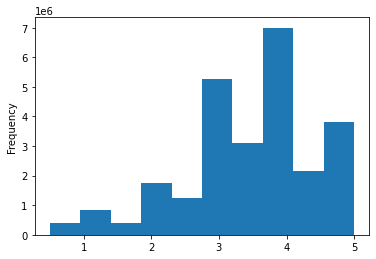

In [69]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()